In [ ]:
pl

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
data= pd.read_csv("C:\\Users\\Administrator\\Desktop\\data\\NHDataset.csv", index_col=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
data.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,36644,072 06 0 088.00,SINGLE FAMILY,"1003 ELVIRA AVE, NASHVILLE",8/21/2015,105000.0,20150826-0086138,No,"1003 ELVIRA AVENUE TRUST, THE","1003 ELVIRA AVE, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0
1,41860,092 01 0 126.00,SINGLE FAMILY,"1015 32ND AVE N, NASHVILLE",12/15/2015,120000.0,20151216-0126500,No,"1015 32ND AVENUE TRUST, THE","1015 32ND AVE N, NASHVILLE, TN",0.18,URBAN SERVICES DISTRICT,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0
2,25923,105 05 0 375.00,SINGLE FAMILY,"1025 SUMMIT AVE, NASHVILLE",1/9/2015,407500.0,20150113-0003602,No,"1025 SUMMITT, LLC","1025 SUMMIT AVE, NASHVILLE, TN",0.14,URBAN SERVICES DISTRICT,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0
3,48650,127 12 0 025.00,SINGLE FAMILY,"1041 HICKORY HOLLOW RD, NASHVILLE",5/25/2016,235000.0,20160608-0057689,No,1041 HICKORY HOLLOW TRUST,"1041 HICKORY HOLLOW RD, NASHVILLE, TN",0.95,GENERAL SERVICES DISTRICT,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0
4,42183,044 15 0 246.00,DUPLEX,"1104 BERRY ST, OLD HICKORY",12/28/2015,140000.0,20151229-0130567,No,"1104 BERRY STREET TRUST, THE","1104 BERRY ST, OLD HICKORY, TN",0.09,GENERAL SERVICES DISTRICT,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  float64
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

In [29]:
# Checking proportion of missing values in the dataset
for i in data.columns:
    missing_prop = (data[i].isna().sum()/ data.shape[0] * 100)
    if missing_prop>0:
        print(i, ':{:.2f}'.format(missing_prop))

PropertyAddress :0.05
OwnerName :55.27
OwnerAddress :53.94
Acreage :53.94
TaxDistrict :53.94
LandValue :53.94
BuildingValue :53.94
TotalValue :53.94
YearBuilt :57.22
Bedrooms :57.23
FullBath :57.02
HalfBath :57.25


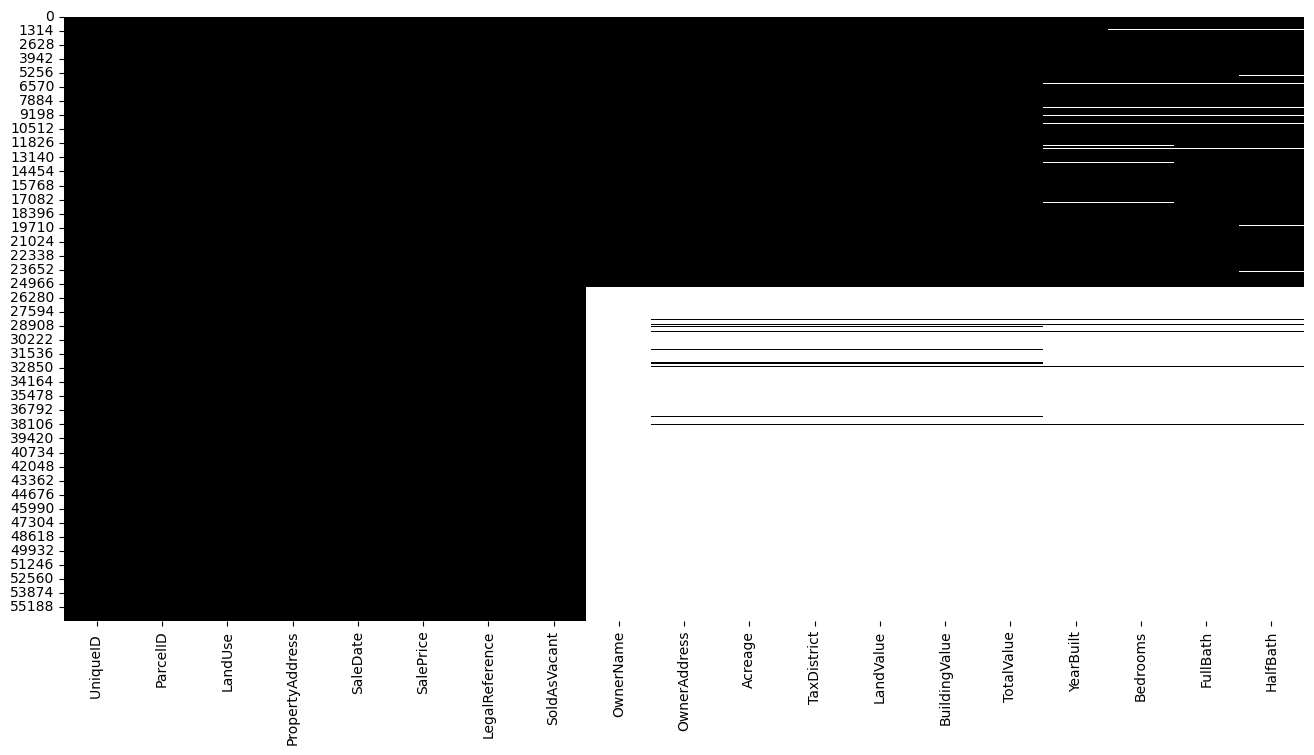

In [30]:
plt.figure(figsize=(16,8),dpi=100)
sns.heatmap(data.isna(), cmap='binary_r', cbar=False)
plt.show()

In [31]:
data.isnull().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
TaxDistrict        30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

In [32]:
nh_data=data.dropna()
nh_data.count()

UniqueID           23705
ParcelID           23705
LandUse            23705
PropertyAddress    23705
SaleDate           23705
SalePrice          23705
LegalReference     23705
SoldAsVacant       23705
OwnerName          23705
OwnerAddress       23705
Acreage            23705
TaxDistrict        23705
LandValue          23705
BuildingValue      23705
TotalValue         23705
YearBuilt          23705
Bedrooms           23705
FullBath           23705
HalfBath           23705
dtype: int64

In [33]:
nh_data.to_csv("C:\\Users\\Administrator\\Desktop\\data\\Processed_Housing_data.csv")

In [34]:
# Creating year month and day columns from saledate columns

nh_data[['SaleDay','SaleMonth','SaleYear']]=nh_data['SaleDate'].str.split("/",expand=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
nh_data['SaleYear'].unique()

array(['2015', '2016', '2014', '2013', '2019'], dtype=object)

In [36]:
nh_data.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDay,SaleMonth,SaleYear
0,36644,072 06 0 088.00,SINGLE FAMILY,"1003 ELVIRA AVE, NASHVILLE",8/21/2015,105000.0,20150826-0086138,No,"1003 ELVIRA AVENUE TRUST, THE","1003 ELVIRA AVE, NASHVILLE, TN",...,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0,8,21,2015
1,41860,092 01 0 126.00,SINGLE FAMILY,"1015 32ND AVE N, NASHVILLE",12/15/2015,120000.0,20151216-0126500,No,"1015 32ND AVENUE TRUST, THE","1015 32ND AVE N, NASHVILLE, TN",...,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0,12,15,2015
2,25923,105 05 0 375.00,SINGLE FAMILY,"1025 SUMMIT AVE, NASHVILLE",1/9/2015,407500.0,20150113-0003602,No,"1025 SUMMITT, LLC","1025 SUMMIT AVE, NASHVILLE, TN",...,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0,1,9,2015
3,48650,127 12 0 025.00,SINGLE FAMILY,"1041 HICKORY HOLLOW RD, NASHVILLE",5/25/2016,235000.0,20160608-0057689,No,1041 HICKORY HOLLOW TRUST,"1041 HICKORY HOLLOW RD, NASHVILLE, TN",...,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0,5,25,2016
4,42183,044 15 0 246.00,DUPLEX,"1104 BERRY ST, OLD HICKORY",12/28/2015,140000.0,20151229-0130567,No,"1104 BERRY STREET TRUST, THE","1104 BERRY ST, OLD HICKORY, TN",...,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0,12,28,2015


In [37]:
nh_data = nh_data.rename(columns={"SaleDay":"SaleMonth","SaleMonth":"SaleDay"})
nh_data.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleMonth,SaleDay,SaleYear
0,36644,072 06 0 088.00,SINGLE FAMILY,"1003 ELVIRA AVE, NASHVILLE",8/21/2015,105000.0,20150826-0086138,No,"1003 ELVIRA AVENUE TRUST, THE","1003 ELVIRA AVE, NASHVILLE, TN",...,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0,8,21,2015
1,41860,092 01 0 126.00,SINGLE FAMILY,"1015 32ND AVE N, NASHVILLE",12/15/2015,120000.0,20151216-0126500,No,"1015 32ND AVENUE TRUST, THE","1015 32ND AVE N, NASHVILLE, TN",...,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0,12,15,2015
2,25923,105 05 0 375.00,SINGLE FAMILY,"1025 SUMMIT AVE, NASHVILLE",1/9/2015,407500.0,20150113-0003602,No,"1025 SUMMITT, LLC","1025 SUMMIT AVE, NASHVILLE, TN",...,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0,1,9,2015
3,48650,127 12 0 025.00,SINGLE FAMILY,"1041 HICKORY HOLLOW RD, NASHVILLE",5/25/2016,235000.0,20160608-0057689,No,1041 HICKORY HOLLOW TRUST,"1041 HICKORY HOLLOW RD, NASHVILLE, TN",...,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0,5,25,2016
4,42183,044 15 0 246.00,DUPLEX,"1104 BERRY ST, OLD HICKORY",12/28/2015,140000.0,20151229-0130567,No,"1104 BERRY STREET TRUST, THE","1104 BERRY ST, OLD HICKORY, TN",...,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0,12,28,2015


In [38]:
nh_data.drop(columns=['SaleDay'],axis=1, inplace=True)

In [39]:
nh_data.drop(columns=['SaleDate'], axis=1, inplace=True)


In [18]:
#nh_data.info()

In [40]:
# Convert SaleMonth and SaleYear to numerical values
nh_data['SaleMonth']= nh_data['SaleMonth'].astype('int64')
nh_data['SaleYear']= nh_data['SaleYear'].astype('int64')
nh_data['YearBuilt']= nh_data['YearBuilt'].astype('int64')

In [41]:
nh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23705 entries, 0 to 25260
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         23705 non-null  int64  
 1   ParcelID         23705 non-null  object 
 2   LandUse          23705 non-null  object 
 3   PropertyAddress  23705 non-null  object 
 4   SalePrice        23705 non-null  float64
 5   LegalReference   23705 non-null  object 
 6   SoldAsVacant     23705 non-null  object 
 7   OwnerName        23705 non-null  object 
 8   OwnerAddress     23705 non-null  object 
 9   Acreage          23705 non-null  float64
 10  TaxDistrict      23705 non-null  object 
 11  LandValue        23705 non-null  float64
 12  BuildingValue    23705 non-null  float64
 13  TotalValue       23705 non-null  float64
 14  YearBuilt        23705 non-null  int64  
 15  Bedrooms         23705 non-null  float64
 16  FullBath         23705 non-null  float64
 17  HalfBath    

In [51]:
nh_data.head(2)

,UniqueID,ParcelID,LandUse,PropertyAddress,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleMonth,SaleYear
0,36644,072 06 0 088.00,SINGLE FAMILY,"1003 ELVIRA AVE, NASHVILLE",105000,20150826-0086138,No,"1003 ELVIRA AVENUE TRUST, THE","1003 ELVIRA AVE, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,18200.0,64600.0,82800.0,1928,2.0,1.0,0.0,8,2015
1,41860,092 01 0 126.00,SINGLE FAMILY,"1015 32ND AVE N, NASHVILLE",120000,20151216-0126500,No,"1015 32ND AVENUE TRUST, THE","1015 32ND AVE N, NASHVILLE, TN",0.18,URBAN SERVICES DISTRICT,13000.0,107800.0,120800.0,1975,2.0,1.0,1.0,12,2015


In [42]:
# Describe the dataset
nh_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,23705.0,27584.465260,16549.621489,1.00,13068.00,27214.00,42016.00,56615.0
SalePrice,23705.0,275002.321325,304442.024679,100.00,125000.00,185000.00,324900.00,10750000.0
Acreage,23705.0,0.455836,0.793932,0.04,0.19,0.27,0.45,47.5
LandValue,23705.0,69049.699430,102161.239287,100.00,22000.00,29900.00,60300.00,1869000.0
BuildingValue,23705.0,173058.252478,193582.787322,1400.00,83900.00,117600.00,189200.00,5824300.0
TotalValue,23705.0,244781.864586,272368.214456,12600.00,109800.00,154800.00,278200.00,6402600.0
YearBuilt,23705.0,1963.723139,26.385627,1799.00,1948.00,1960.00,1983.00,2017.0
Bedrooms,23705.0,3.094115,0.850667,0.00,3.00,3.00,4.00,11.0
FullBath,23705.0,1.896984,0.955172,0.00,1.00,2.00,2.00,10.0
HalfBath,23705.0,0.286648,0.489565,0.00,0.00,0.00,1.00,3.0


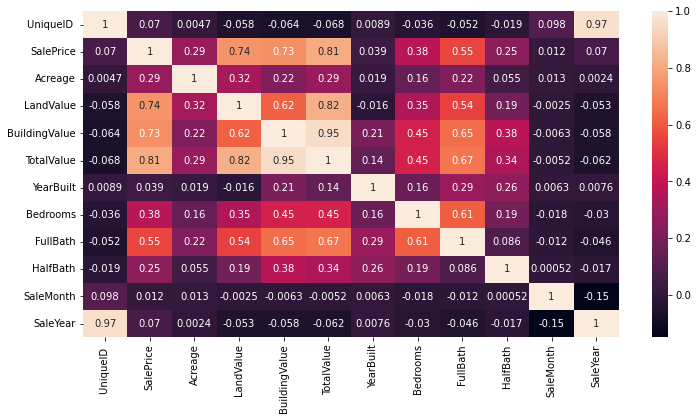

In [43]:
# relationship between the variables
cor=nh_data.corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor, annot=True)
plt.show()

From the correlation heatmap, LandValue, BuildingValue, TotalValue, Bedrooms, FullBath and HalfBath correlate with SalePrice.     
 They can be use to build the prediction model

### ML

In [68]:
from sklearn.model_selection import train_test_split

In [151]:
x = nh_data[['TotalValue','LandValue','BuildingValue','Acreage','Bedrooms','FullBath','HalfBath','SaleYear','SaleMonth','YearBuilt']]
y = nh_data[['SalePrice']]

In [152]:
x.shape

(23705, 10)

In [153]:
y.shape

(23705, 1)

In [154]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [156]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17778, 10)
(17778, 1)
(5927, 10)
(5927, 1)


In [157]:
lr.fit(x_train,y_train)

LinearRegression()

In [158]:
y_pred= lr.predict(x_test)

In [159]:
y_test

,SalePrice
19015,240000.0
16088,120000.0
24336,275000.0
17157,310000.0
9558,225000.0
...,...
6106,333000.0
6010,161000.0
24797,295000.0
10848,400000.0


In [160]:
y_pred

array([[221883.00925997],
       [148717.00943838],
       [245014.91599783],
       ...,
       [223304.24891464],
       [270588.24225166],
       [422931.73538333]])

In [161]:
from sklearn.metrics import r2_score


In [162]:
r2_score(y_test, y_pred)*100 

73.45586151234407

In [165]:
print(lr.score(x_test,y_test))

0.7345586151234407


In [26]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputer= mean_imputer.fit(df1)
imputed_df =mean_imputer.transform(df1.values)
df = pd.DataFrame(data=imputed_df, columns=['Acreage','LandValue','BuildingValue','TotalValue','Bedrooms','FullBath','HalfBath'])

df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath
0,0.17,18200.0,64600.0,82800.0,2.0,1.0,0.0
1,0.18,13000.0,107800.0,120800.0,2.0,1.0,1.0
2,0.14,80000.0,226600.0,306600.0,3.0,3.0,1.0
3,0.95,50000.0,157400.0,207400.0,3.0,2.0,0.0
4,0.09,17000.0,64100.0,81100.0,6.0,2.0,0.0


In [25]:
df.head()

,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath
0,0.17,18200.0,64600.0,82800.0,2.0,1.0,0.0
1,0.18,13000.0,107800.0,120800.0,2.0,1.0,1.0
2,0.14,80000.0,226600.0,306600.0,3.0,3.0,1.0
3,0.95,50000.0,157400.0,207400.0,3.0,2.0,0.0
4,0.09,17000.0,64100.0,81100.0,6.0,2.0,0.0
